In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
wells=pd.read_csv('../data/filtered_2.csv')

In [6]:
wells.shape

(16685, 103)

## Exploratory Data Analysis

### Features for Rock/Geology

In [10]:
rock = wells[['Payzone_FT','GammaRay_API', 'BulkDensity_GPerCC','Resistivity_OHMSM', 'DensityPorosity_PCT',
              'EffectivePorosity_PCT', 'ClayVolume_PCT', 'NonClayVolume_PCT', 'WaterSaturation_PCT', 'PhiH_FT',
              'HCPV_PCT', 'HeightOfHCPV_FT', 'TotalOrganicCarbon_WTPCT']]

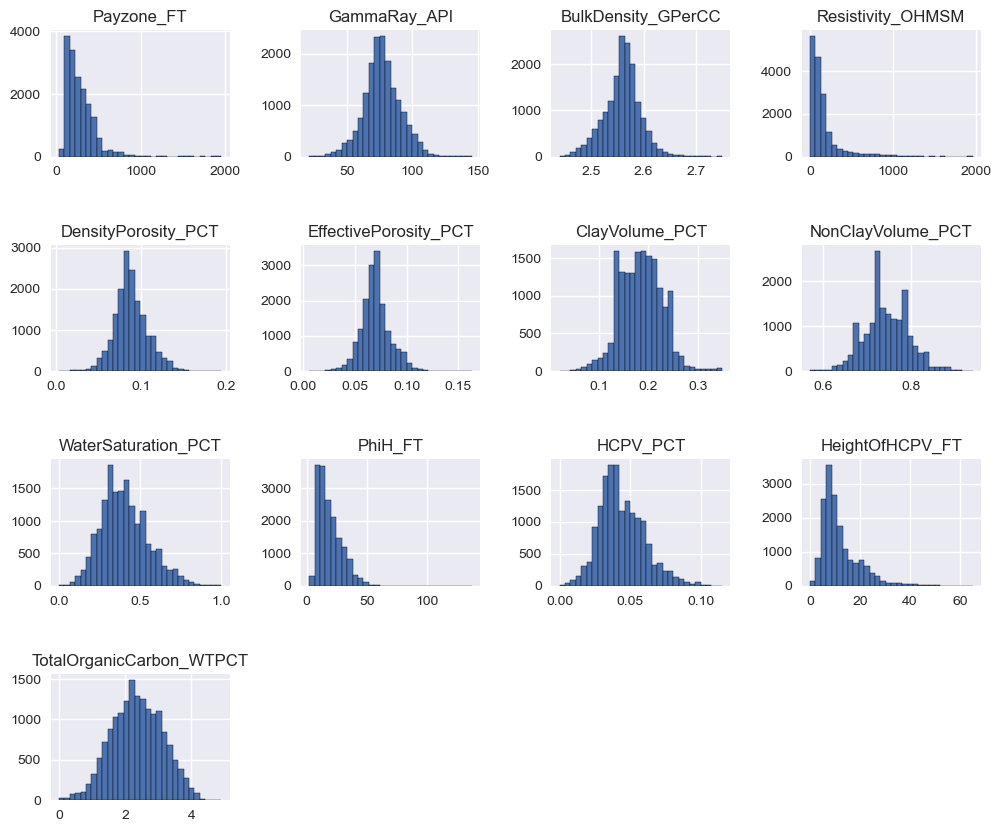

In [ ]:
plt.style.use('seaborn')

rock.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### Target Variable - Ultimate Hydrocarbon Recovery - Oil, Gas and Combined Oil/Gas

In [ ]:
target_eur=wells[['EURWH_MBOE', 'OilEURWH_MBBL', 'GasEURWH_BCF']]

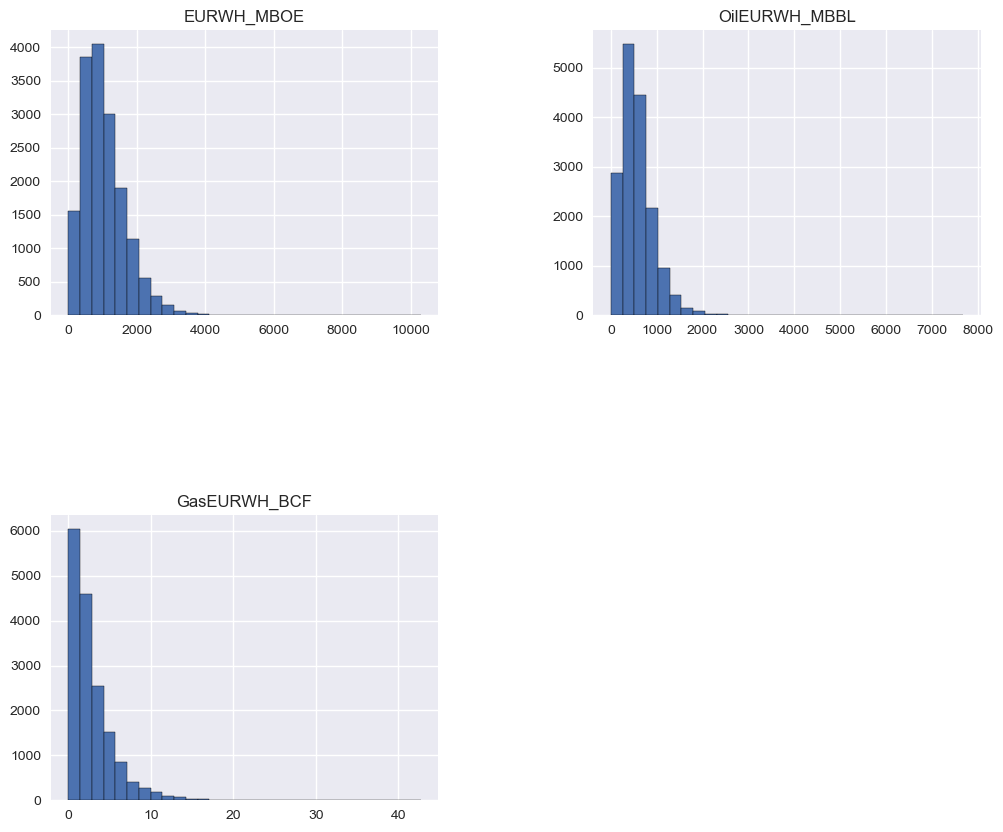

In [ ]:
plt.style.use('seaborn')

target_eur.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

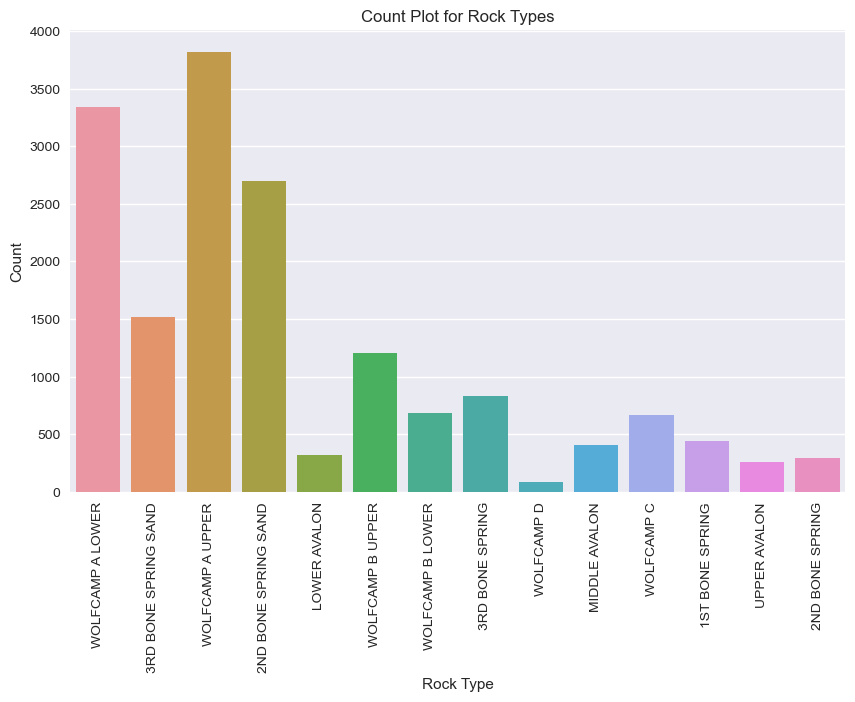

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='ENVInterval', data=wells)

plt.title('Count Plot for Rock Types')
plt.xlabel('Rock Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotates the x-axis labels to prevent overlap

plt.show()

In [ ]:
wells['ENVProdWellType'].unique()

array(['LIQUIDS RICH GAS (10-40% WH LIQUIDS)', 'OIL (40%+ WH LIQUIDS)',
       'DRY GAS (0-1% WH LIQUIDS)', 'WET GAS (1-10% WH LIQUIDS)'],
      dtype=object)

In [ ]:
wells['ENVProdWellType']= wells['ENVProdWellType'].replace({'LIQUIDS RICH GAS (10-40% WH LIQUIDS)': 'CONDENSATE',
                                                           'OIL (40%+ WH LIQUIDS)': 'OIL',
                                                           'DRY GAS (0-1% WH LIQUIDS)':'DRY GAS',
                                                           'WET GAS (1-10% WH LIQUIDS)':'WET GAS'})

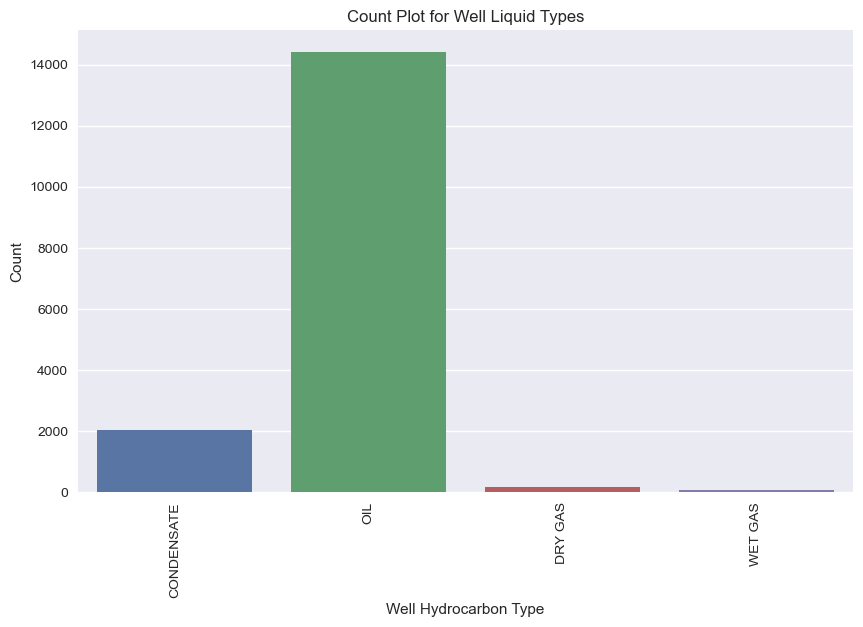

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='ENVProdWellType', data=wells)

plt.title('Count Plot for Well Liquid Types')
plt.xlabel('Well Hydrocarbon Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotates the x-axis labels to prevent overlap

plt.show()

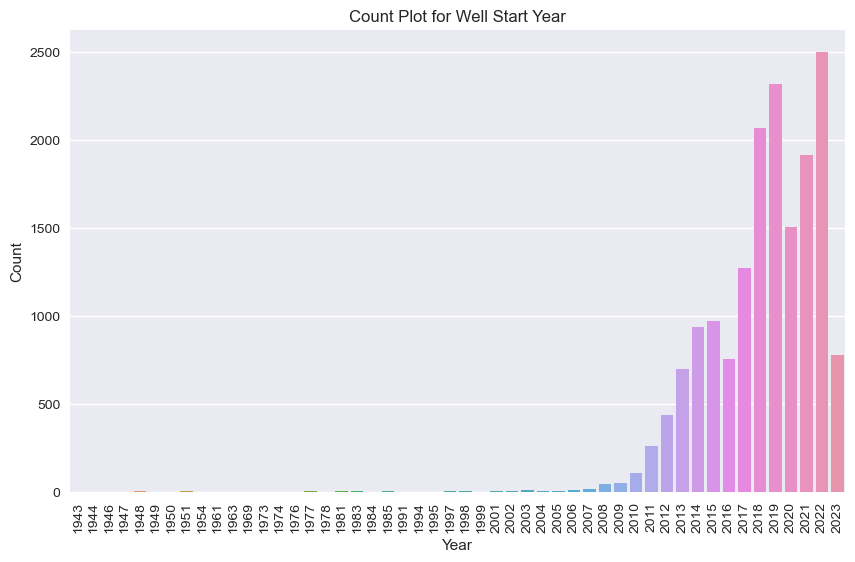

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='Vintage', data=wells)

plt.title('Count Plot for Well Start Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotates the x-axis labels to prevent overlap

plt.show()

In [ ]:
wells2=wells[wells['Vintage']>2009]

In [ ]:
wells2.shape

(16505, 103)

### Cross Plot of First 3 Month Production Data

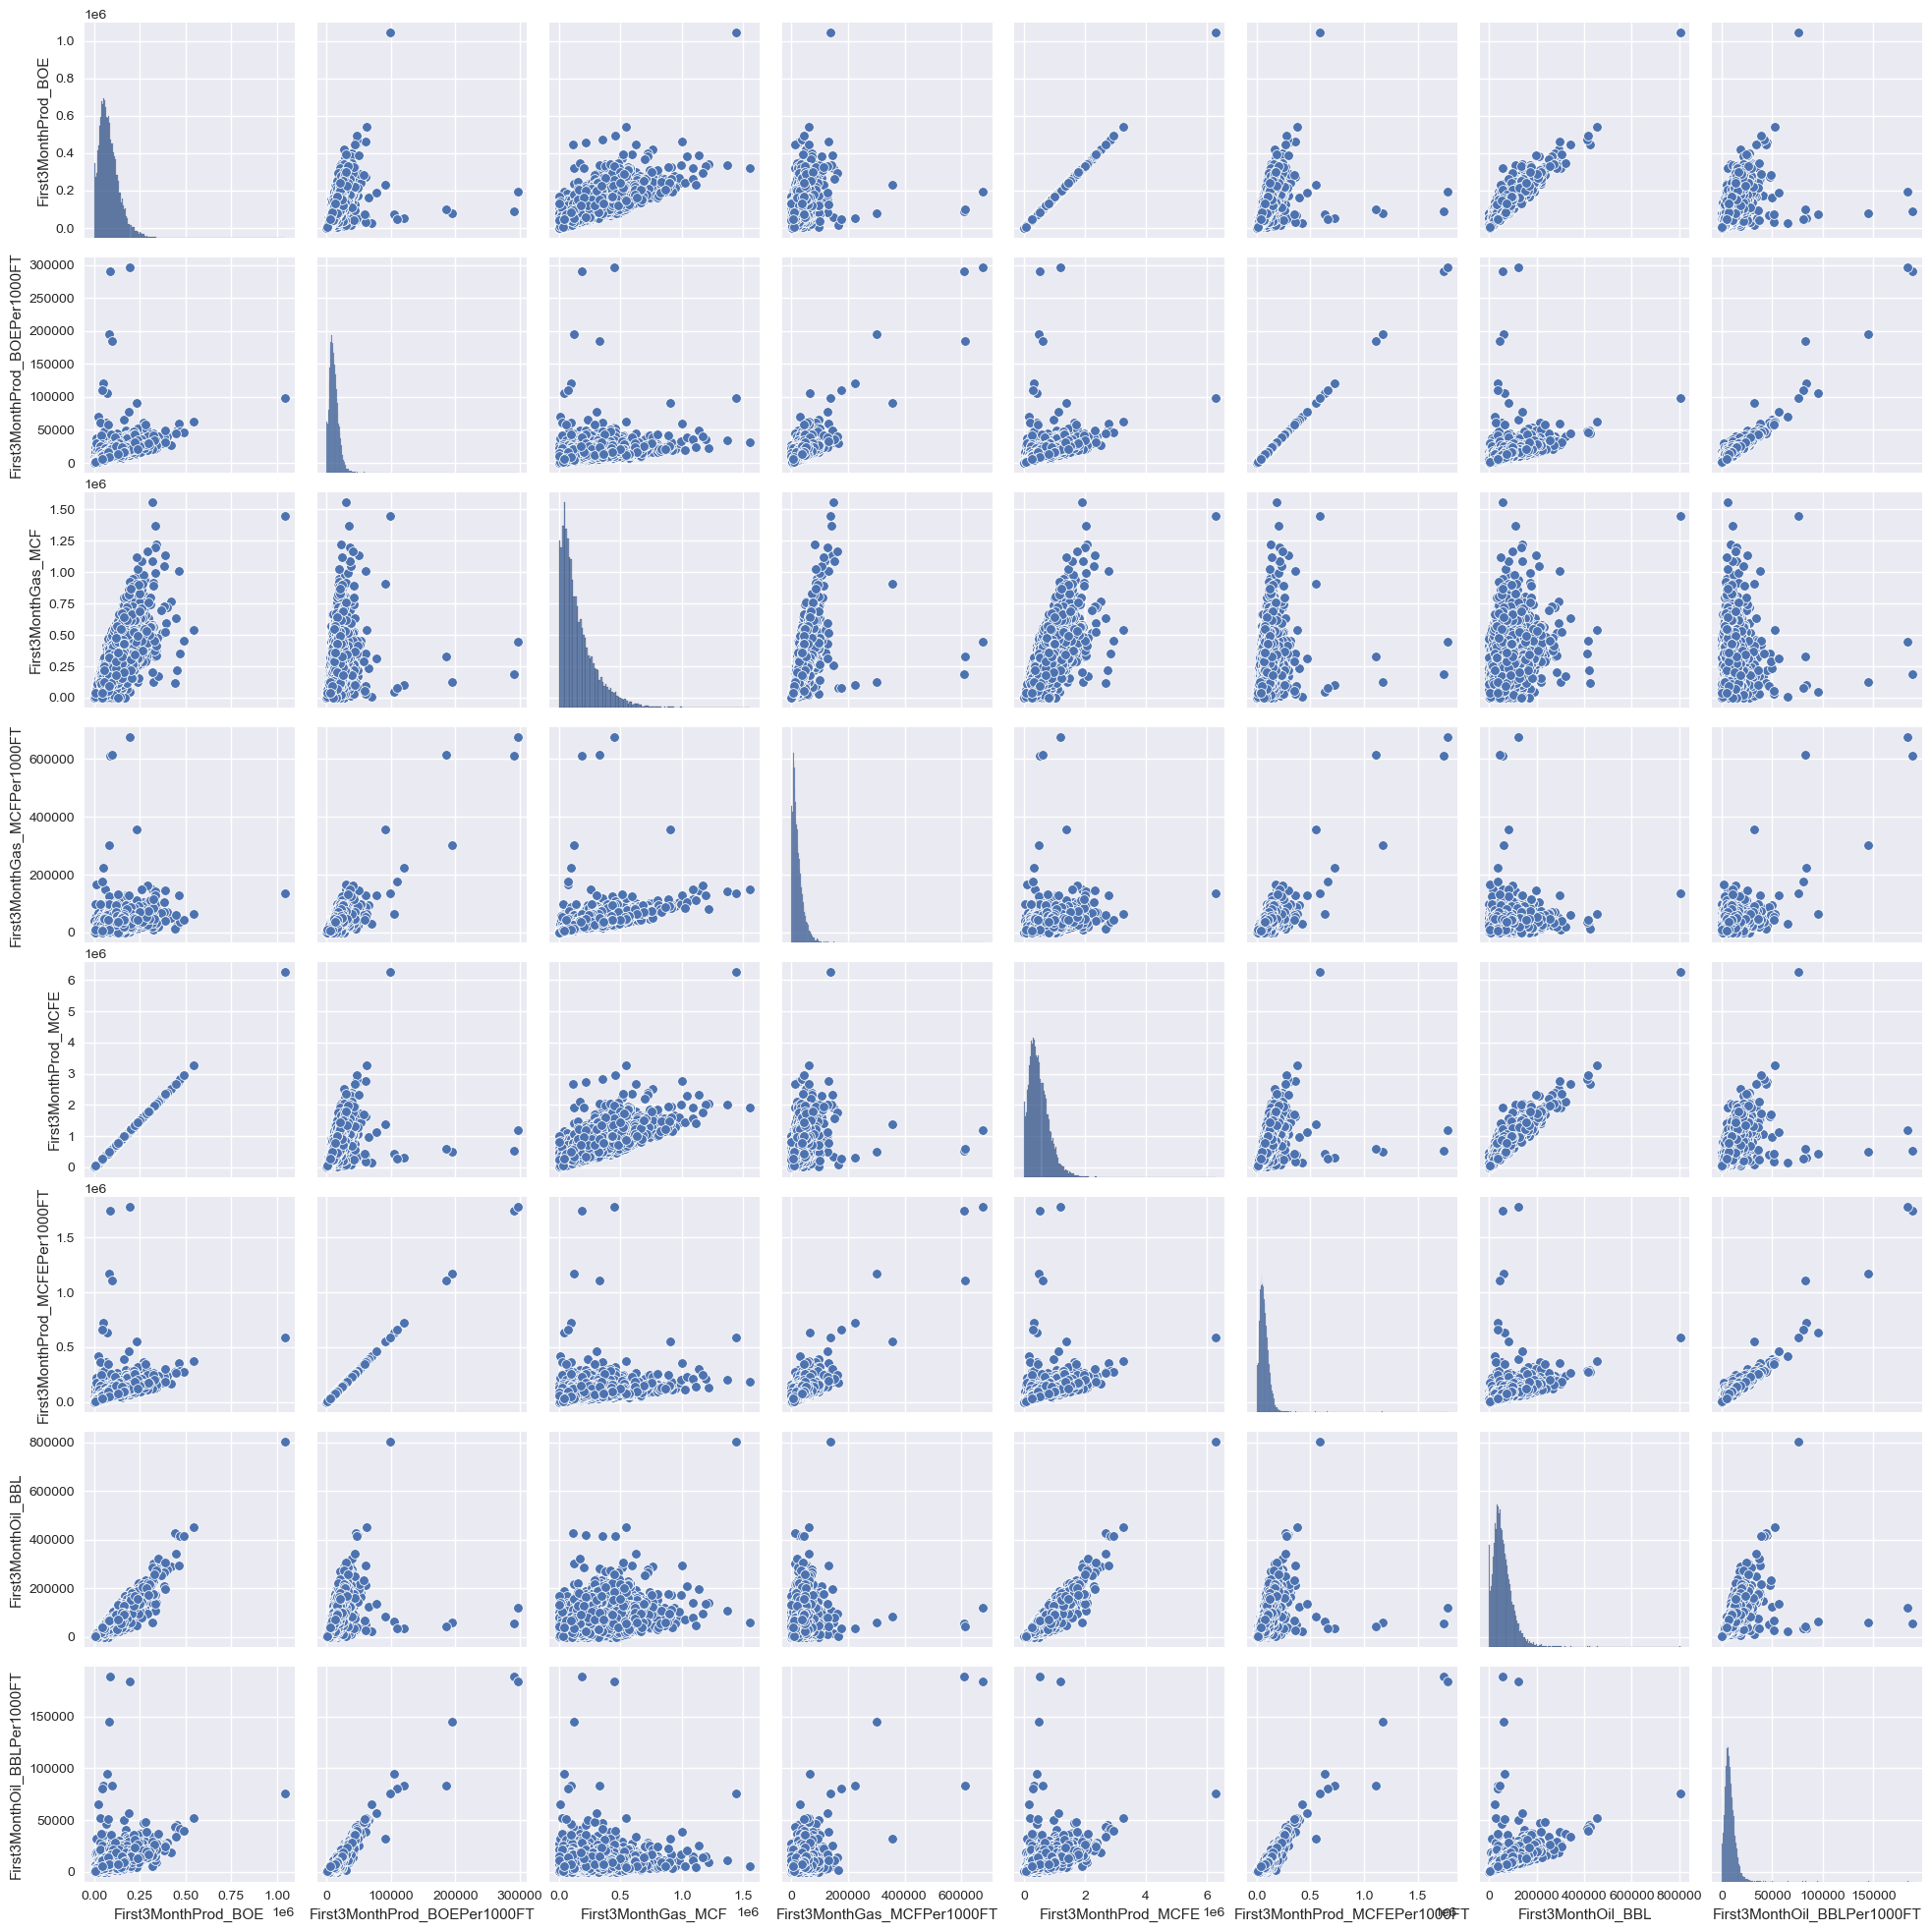

In [ ]:
sns.pairplot(wells2[['First3MonthProd_BOE', 'First3MonthProd_BOEPer1000FT', 'First3MonthGas_MCF',
                 'First3MonthGas_MCFPer1000FT','First3MonthProd_MCFE', 'First3MonthProd_MCFEPer1000FT',
                 'First3MonthOil_BBL', 'First3MonthOil_BBLPer1000FT']])

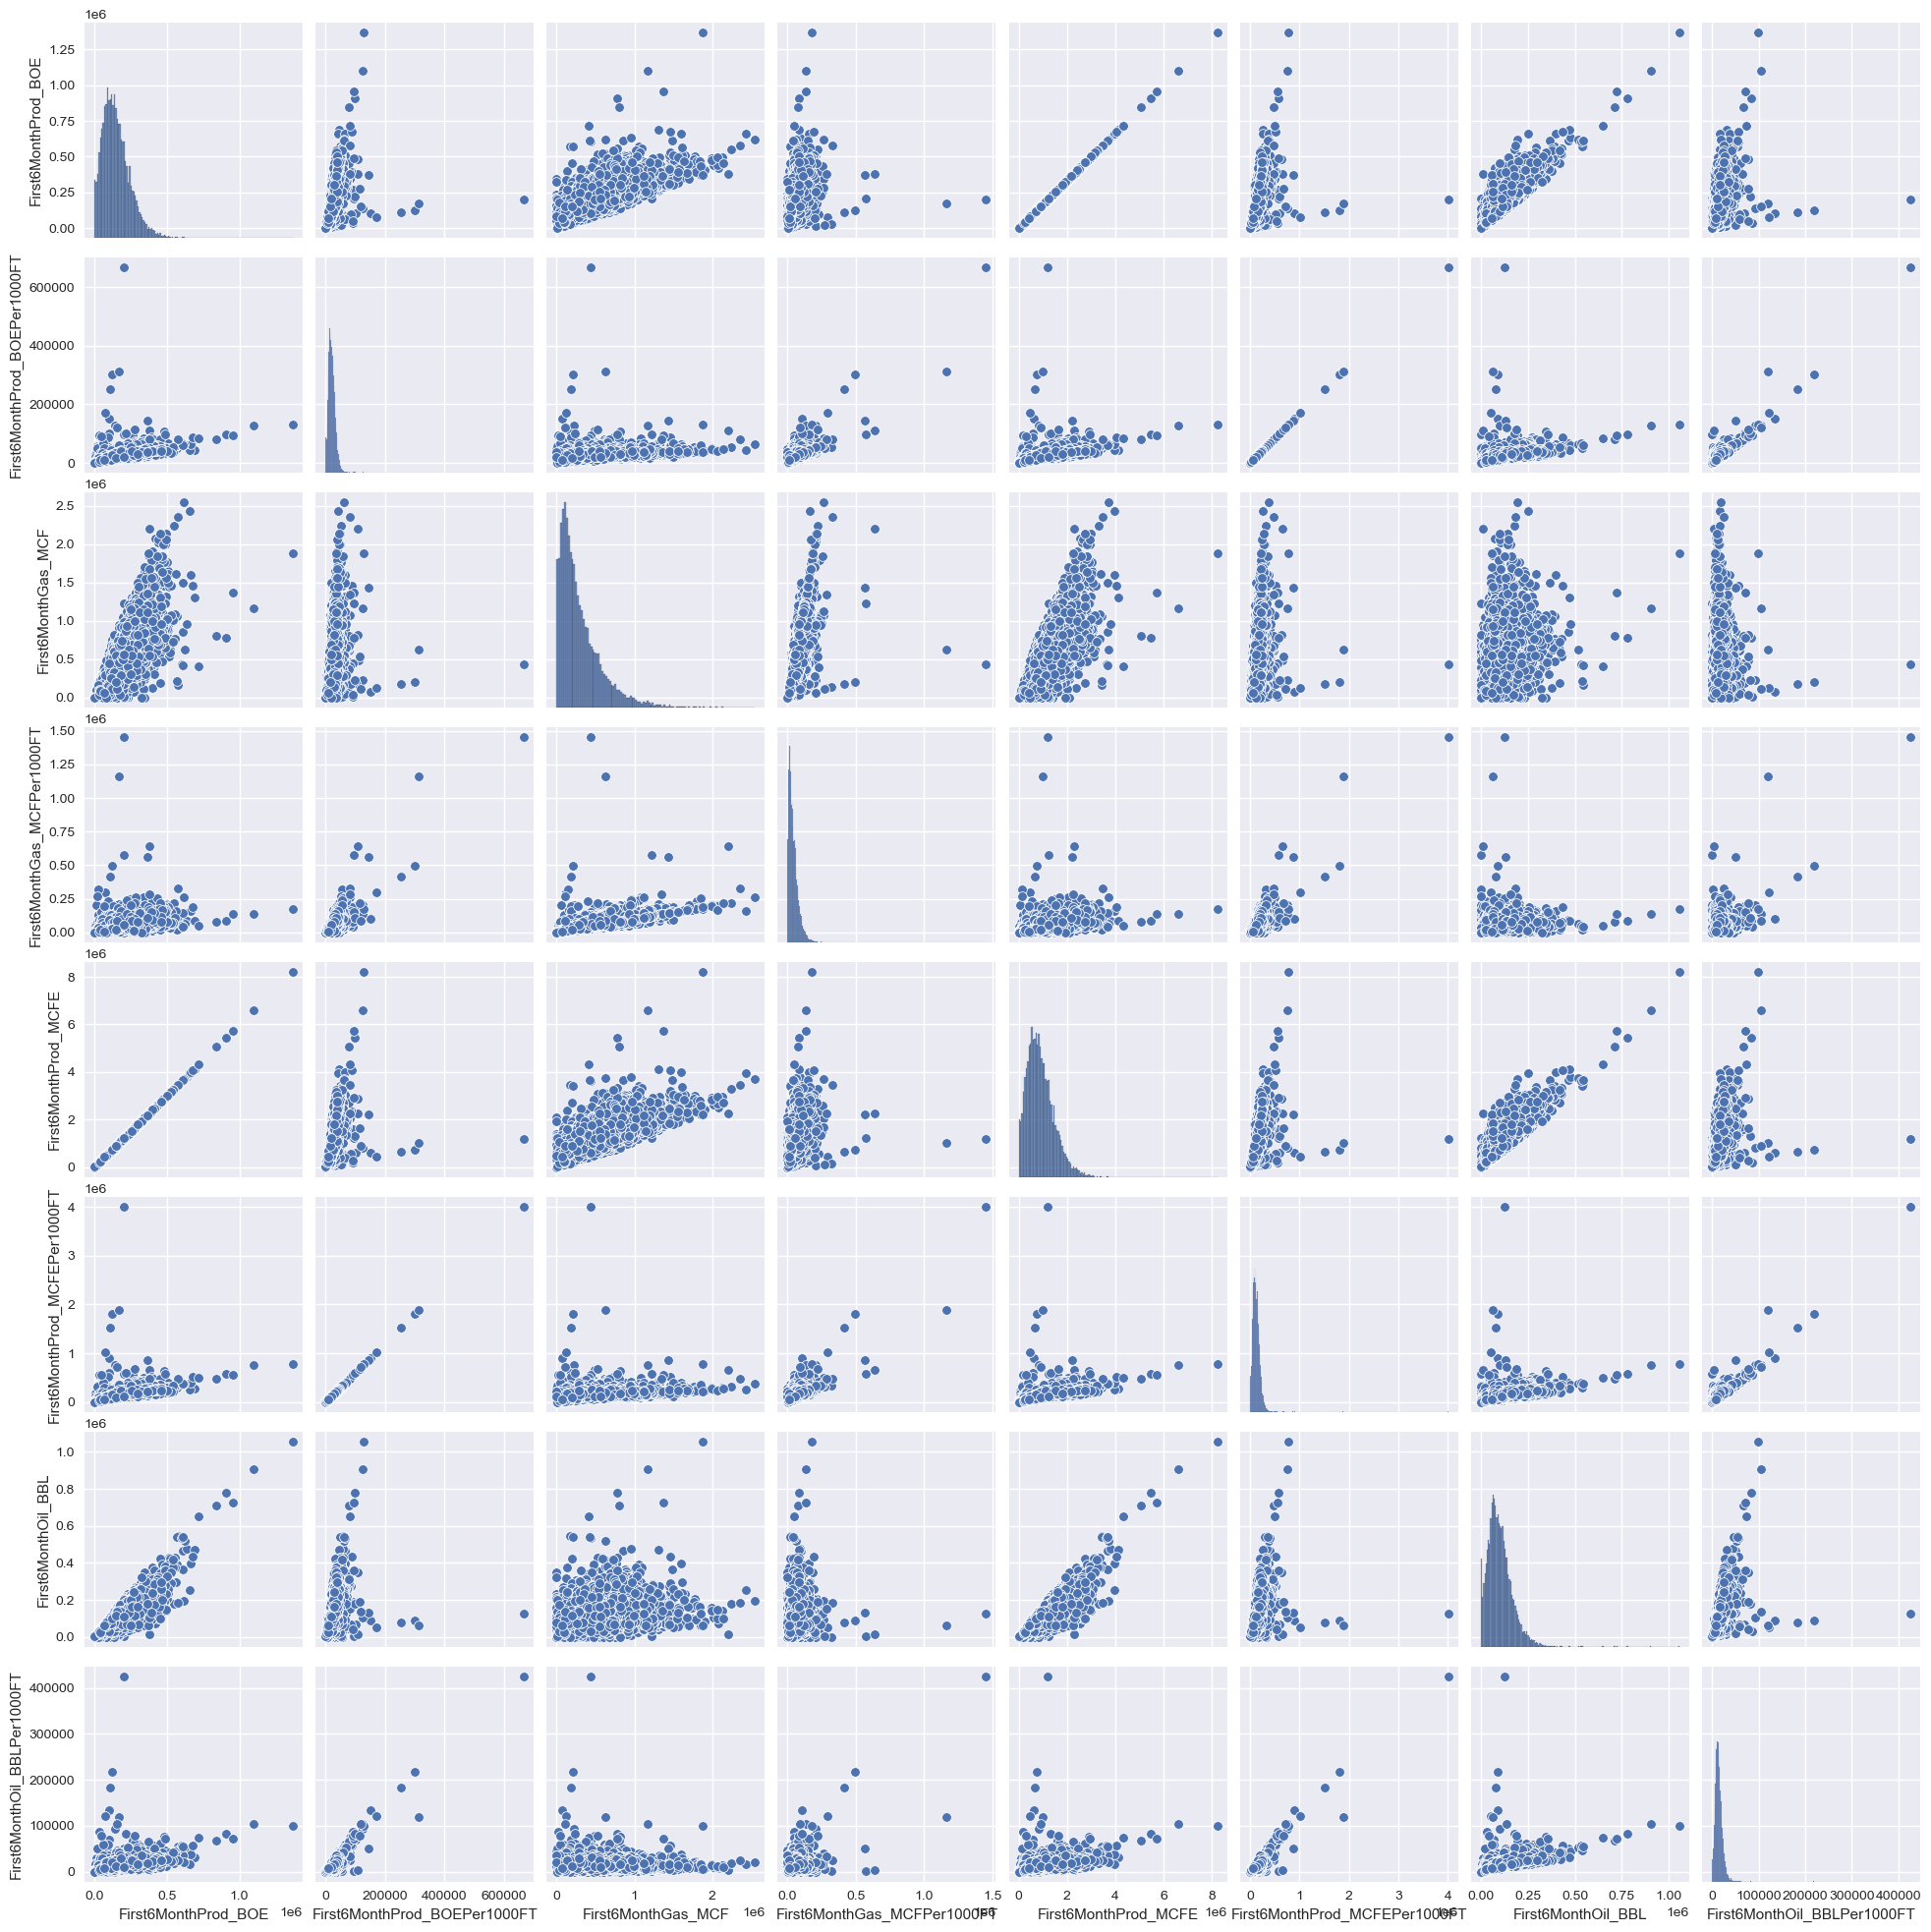

In [ ]:
sns.pairplot(wells[['First6MonthProd_BOE', 'First6MonthProd_BOEPer1000FT', 'First6MonthGas_MCF',
                 'First6MonthGas_MCFPer1000FT','First6MonthProd_MCFE', 'First6MonthProd_MCFEPer1000FT',
                 'First6MonthOil_BBL', 'First6MonthOil_BBLPer1000FT']])

In [ ]:
wells2= wells2.drop(columns=['First3MonthProd_MCFE', 'First3MonthProd_MCFEPer1000FT', 'First6MonthProd_MCFE',
                             'First6MonthProd_MCFEPer1000FT','First9MonthProd_MCFE', 'First9MonthProd_MCFEPer1000FT',
                             'First12MonthProd_MCFE', 'First12MonthProd_MCFEPer1000FT'])

In [ ]:
wells2= wells2.drop(columns=['First3MonthProd_MCFE', 'First3MonthProd_MCFEPer1000FT', 'First6MonthProd_MCFE',
                             'First6MonthProd_MCFEPer1000FT','First9MonthProd_MCFE', 'First9MonthProd_MCFEPer1000FT',
                             'First12MonthProd_MCFE', 'First12MonthProd_MCFEPer1000FT'])

(16505, 95)

In [ ]:
wells2= wells2.drop(columns=['PeakProd_MCFE', 'PeakProd_MCFEPer1000FT', 'CumProd_MCFE','CumProd_MCFEPer1000FT'])

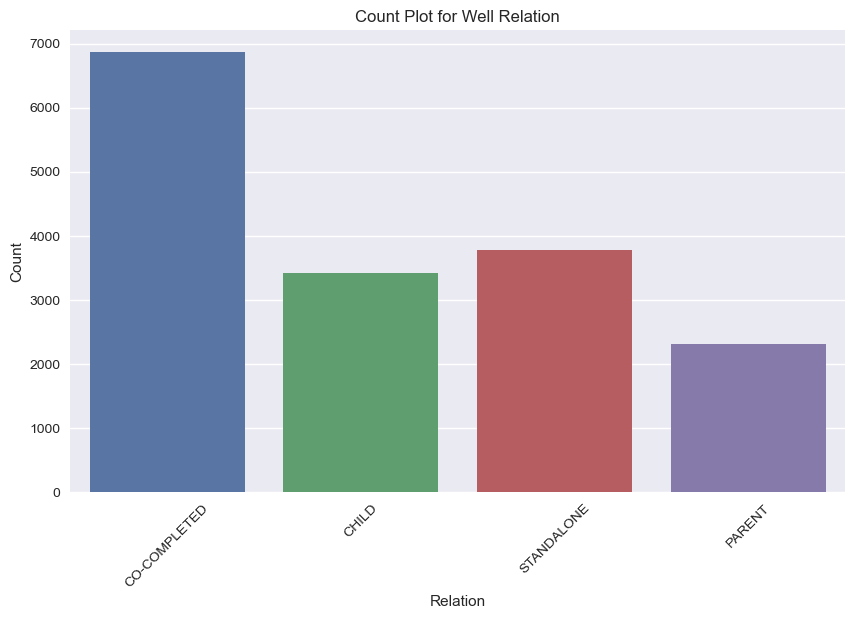

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='ParentChildSameZone', data=wells2)

plt.title('Count Plot for Well Relation')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap

plt.show()